# Module 3 Final Project

Student name: **Cynthia Pedrasa**  
Student pace: **self paced**  
Scheduled project review date/time:  **November 27, 2019**  
Instructor name: **Eli Thomas**  
Blog post URL:  https://cpedrasa.github.io/racial_bias_in_machine_learning_algorithm  

## Table of contents

 
Background:  
  
Experimental Design:  

I. <a href="#1.-Obtaining-the-Data">Obtaining the Data</a>  
  + A. <a href="#1a.-Import-the-Libraries">Import the Libraries</a>  
  + B. <a href="#1b.-Connect-to-the-Northwind-database">Connect to the Northwind database</a>  
  + C. <a href="#1c.-Inspect-the-Data">Inspect the Data</a>  
  
II. <a href="#2.-Scrubbing-the-Data">Scrubbing the Data</a>  
  + A. <a href="#2a.-Missing-Values-and-Distinct-Values">Missing Values and Distinct Values</a>  



III. <a href="#3.-Exploring-the-Data">Exploring the Data</a>  
  + A. <a href="#3a.-Descriptive-Statistics">Descriptive Statistics</a>  
  + B. <a href="#3b.-Outliers-Check">Outliers Check</a> 
  + C. <a href="#3c.-Normality-check">Normality check</a>  
  + D. <a href="#3d.-Sample-Size-and-Data-type-check">Sample Size and Data type check</a>  
  + E. <a href="#3e.-Equal-Variance-check-(Homoscedasticity)">Equal Variance check (Homoscedasticity)</a>  
  + F. <a href="#3f.-Independent-sample-check-(Multicollinearity)">Independent sample check (Multicollinearity)</a>  
  
IV. <a href="#4.-Run-the-Statistical-Test">Run the Statistical Test</a>  
  + A. <a href="#4a.-Statistical-Hypothesis-Process">Statistical Hypothesis Process</a> 
  + B. <a href="#4b.-Create-a-Sample-Distribution-of-Sample-Means-(with-replacement)">Create a Sample Distribution of Sample Means (with replacement)</a> 
  + C. <a href="#4c.-Run-the-hypothesis-test">Run the hypothesis test</a>  
  + D. <a href="#4d.-Effect-Size">Effect Size</a>  
  + E. <a href="#4e.-Is-there-a-difference-in-the-mean-quantity-between-discount-levels?">Is there a difference in the mean quantity between discount levels?</a>
  + F. <a href="#4f.-Is-there-a-difference-in-the-mean-quantity-of-order-between-product-categories?">Is there a difference in the mean quantity of order between product categories?</a>  
  + G. <a href="#4g.-Is-there-a-statistically-significant-difference-in-discount-between-product-categories?">Is there a statistically significant difference in discount between product categories?</a>   
  + H. <a href="#4h.-Is-there-a-difference-in-the-mean-quantity-of-order-between-salesperson?">Is there a difference in the mean quantity of order between salesperson?</a>
  + I. <a href="#4i.-Is-there-a-difference-in-the-mean-Total-Sales-between-Customer-Country?">Is there a difference in the mean Total Sales between Customer Country?</a>  
  
V. <a href="#5.-Interpret-Findings">Interpret Findings</a>  

## Project Background
For this project, I will be working with the Northwind database--a free, open-source dataset created by Microsoft containing data from a fictional company.  The goal of this project is to test the student's ability to gather information from a real-world database and use the knowledge of statistical analysis and hypothesis testing to generate analytical insights to answer the following question:

**_Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?_**

In addition to answering this question with a hypothesis test, the student will also need to come up with **_at least 3 other hypotheses to test on your own_**.  These can by anything that you think could be important information for the company. 

### Experimental Method: The Data Scientist would go to the following steps to conduct the experimental design to answer the business questions.

1. **Making Observations:** Northwind would like to administer pricing policies involving quantity discounts but the company's knowledge of these discounts is quite limited. Northwind recognizes that to be competitive, they need to meet customer expectations on quantity discounts and need data-driven decision-making in the development, implementation of a profitable discount schedule.

2. **Examine the Research:** The Data scientist will work with the Marketing Manager and other Business stakeholders to review the current best practice guidelines from the economics and marketing literature in the quantity discounts to understand the metrics for optimization. This step include the Data Science Framework iterative processes of obtaining the data, cleansing the data, exploring the data to understand the business problem/question and help finding the appropriate hypothesis test (test statistic) to use.

3. **Form a Hypothesis:**  Before we run any hypothesis test, we need to specify the two hypotheses: the null hypothesis (H0) and the Alternate Hypothesis (Ha). we start by assuming the null hypothesis which is "there is no difference between the quantity of product ordered with discounts or without discounts and that what we're seeing is just random probability that the difference is due to chance versus not. We are interested in disproving the null hypothesis.

4. **Conduct the Experiment.**  After we explored the data, formulated the hypothesis, and decided on the correct hypothesis test to use, we will execute the statistical test.

5. **Analyze experimental results:** looking at the data and understanding what happened after running the test statistic to determine if the test is statistically significant or not.

6. **Draw conclusions:** When we find strong enough evidence against the null hypothesis,(p value <= significace level) we reject the null hypothesis/the result is statistically significant. When we do not find evidence against the null hypothesis,(p value >= significace level)  we fail to reject the null hypothesis/the result is not statistically significant.


## 1. Obtaining the Data

### 1a. Import the Libraries

In [63]:

#Import the libraries 
import warnings # way to warn programmers about changes in language or library features
warnings.filterwarnings('ignore') # hide matplotlib warnings
import sqlite3 # working with sqlite database engine
from pandas import read_sql_query

import pandas as pd # data structures and data analysis tools for python
import json # work with json file
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals()) #write a lambda function that will make it quicker and easier to write queries

import matplotlib.pyplot as plt # plotting library for Python
#%matplotlib inline # magic function renders the plot out cell even if plt.show function is not called

import seaborn as sns #  a graphic library built on top of Matplotlib

import numpy as np # support for multi-dimensional arrays and matrices
from numpy import array

#import itertools # for combinations
import scipy
from scipy import stats # scientific computing and technical computing.
from scipy.stats import kurtosis, skew
from scipy.stats import shapiro # normality test 

import statsmodels.api as sm # estimate statistical models, and perform statistical tests
from statsmodels.formula.api import ols # ordinary least squares - for multi-variate regression model 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison) #calculate pairwise comparisons
from statsmodels.stats.multicomp import MultiComparison #post hoc test to find where the differences occurred
from statsmodels.stats.power import TTestIndPower, TTestPower # power of the statistical test
from statsmodels.graphics.gofplots import qqplot #visualizing normality of distribution

from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 1b. Connect to the Northwind database

In [64]:
# Create the sqlite3 connection.
conn = sqlite3.connect('Northwind_small.sqlite')

#Create the cursor to fetch data from the database
cur = conn.cursor()

#Query all table objects in the database and return a DataFrame on the result set of the query 
NW_table = pd.read_sql_query("""SELECT name 
                                FROM sqlite_master 
                                WHERE type='table'""", conn)
NW_table = NW_table['name'].tolist()
print(NW_table)


['Employee', 'Category', 'Customer', 'Shipper', 'Supplier', 'Order', 'Product', 'OrderDetail', 'CustomerCustomerDemo', 'CustomerDemographic', 'Region', 'Territory', 'EmployeeTerritory']


In [65]:
#Read all the NW Tables and save in dataframes
NW_table = ['Employee','Category','Customer','Shipper', 'Supplier', 'Product', 'OrderDetail', 
            'CustomerCustomerDemo', 'CustomerDemographic', 'Region', 'Territory', 'EmployeeTerritory']

for t in NW_table:
     exec('{t} = pd.read_sql_query("SELECT * FROM {t}", conn)'.format(t=t))


Let's remove the Order table from the NW_table list as it is returning an error when the query is ran.  
"Uncaught Error: near "Order": syntax error is received when the [Order] is queried from https://sqliteonline.com/"  


As a workaround, I exported the [Order] table as json from sqliteonline by right clicking on the table name.  
The Order table has the associated cutomer who placed the order as well as the sales person, freight, order date and shipping information.


In [66]:
#Read the Orders table from the exported JSON file

with open('Order.json') as data_file:    
    Orders = json.load(data_file)
Orders = pd.DataFrame(Orders)
Orders.head(1)


,CustomerId,EmployeeId,Freight,Id,OrderDate,RequiredDate,ShipAddress,ShipCity,ShipCountry,ShipName,ShipPostalCode,ShipRegion,ShipVia,ShippedDate
0,VINET,5,32.38,10248,2012-07-04,2012-08-01,59 rue de l'Abbaye,Reims,France,Vins et alcools Chevalier,51100,Western Europe,3,2012-07-16


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 1c. Inspect the Data  

In [67]:
#Inspect the columns & check the totals and data types in the Northwind tables

for t in NW_table:
    exec('print(t), print({t}.info(), conn)'.format(t=t), print("\n")) 
print("\n",'Orders')
print(Orders.info())




Employee
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB
None <sqlite3.Connection object at 0x7fb5d09749d0>


Category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns

+ The Order Detail table contains the features we would like to test, namely, Discount and Quantity.  
+ There are 2155 records containing the orderid along with the Product, unit price, discounts, and quantity for that order.

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

## 2. Scrubbing the Data

### 2a. Missing Values and Distinct Values  

It seems the two features (Quantity & Discount) that we are interested in are in the OrderDetail table and we will not need the Order table at this time.  
+ Let's Inspect the OrderDetail table for any missing null values.
+ Let's also inpect the distinct discount values.


In [68]:
#Let's inspect the OrderDetails Table
OrderDetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [69]:
#Query the OrderDetail table for nulls and check the distinct discount values
OrderDetail.isna().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

In [70]:
OrderDetail[(OrderDetail.Discount != 0)].count()

Id           838
OrderId      838
ProductId    838
UnitPrice    838
Quantity     838
Discount     838
dtype: int64

In [71]:
#Inspect the total quantity per discount amount as well as the total quantities in each discount level.
pct_discount = OrderDetail.groupby('Discount').Quantity.agg(['count','sum'])
pct_discount['%_disc'] = (OrderDetail.groupby('Discount').Quantity.agg(['count']) / len(OrderDetail) *100).round()
pct_discount

,count,sum,%_disc
Discount,,,
0.00,1317,28599,61.0
0.01,1,2,0.0
0.02,2,4,0.0
0.03,3,5,0.0
0.04,1,1,0.0
0.05,185,5182,9.0
0.06,1,2,0.0
0.10,173,4366,8.0
0.15,157,4456,7.0


+ There are no missing values in the OrderDetail Table.     
+ 61% (1317 out of 2155) of the Total Orders are without Discounts and 39% (838 fo 2155) of the Orders are with discounts applied.  
+ Most orders have either 5%, 10%, 20%, 15%, or 25% discounts applied to them.  
+ The top 5 Order Quantity are 20, 30, 10, 15, 40.  


In [72]:
#Let's change 8 records with 0% discount amounts to 5% before moving on to the next step
OrderDetail['Discount'] = OrderDetail['Discount'].apply(lambda x: 0.05 if (x > 0) & (x < 0.10) else x)
OrderDetail.groupby('Discount').Quantity.agg(['count','sum'])

,count,sum
Discount,,
0.00,1317,28599
0.05,193,5196
0.10,173,4366
0.15,157,4456
0.20,161,4351
0.25,154,4349


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

## 3. Exploring the Data

In this step, we will explore the data to understand the business problem/question and help find the appropriate hypothesis test (test statistic) to use. We will compare two groups by comparing the means of two distributions to determine if discounts would have an effect on the quanity of products ordered and we would like to explore the data and go through our checklist of assumptions needed to conduct a valid two sample test. We would also explore other features that may help the organization decide on which other metrics to test for optimizing discount pricing strategies. 


### 3a. Descriptive Statistics

In [73]:
#Let's check the Descriptive Statistics to determine the Count, Mean, and the Standard Deviation of the distribution
OrderDetail[['Quantity','Discount']].describe()

,Quantity,Discount
count,2155.000000,2155.000000
mean,23.812993,0.056241
std,19.022047,0.083431
min,1.000000,0.000000
25%,10.000000,0.000000
50%,20.000000,0.000000
75%,30.000000,0.100000
max,130.000000,0.250000


In [74]:
MeanQuantity = (OrderDetail['Quantity'].mean())
MeanDiscount = (OrderDetail['Discount'].mean())
StdDevQty = (OrderDetail['Quantity'].std())
StdDevDscnt = (OrderDetail['Discount'].std())
RelativeStdDevQty = (StdDevQty/MeanQuantity)  * 100
RelativeStdDevDscnt = (StdDevDscnt/MeanDiscount)  * 100

print('The average quantity ordered is ', (MeanQuantity.round(2)), 
      'with a minimum quantity of',(OrderDetail['Quantity'].min()), 
      ', maximum of ', (OrderDetail['Quantity'].max()))
print('The average discount amount is ', (MeanDiscount.round(2)), 
      'with a minimum discount of',(OrderDetail['Discount'].min()), 
      ', maximum of ', (OrderDetail['Discount'].max()))
print('----------------------------------------')
print('Quantity has a standard deviation of ', StdDevQty.round(3))
print('Discount has a standard deviation of ', StdDevDscnt.round(3))


The average quantity ordered is  23.81 with a minimum quantity of 1 , maximum of  130
The average discount amount is  0.06 with a minimum discount of 0.0 , maximum of  0.25
----------------------------------------
Quantity has a standard deviation of  19.022
Discount has a standard deviation of  0.083


In [75]:
#Let's inspect further the Orders with or without discounts applied and create 2 groups (w/ & w/o discounts)
DiscountedOrder = pd.DataFrame(OrderDetail[(OrderDetail.Discount != 0)])
NondiscountedOrder = pd.DataFrame(OrderDetail[OrderDetail.Discount == 0])

display(DiscountedOrder.head(), NondiscountedOrder.head())

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
6,10250/51,10250,51,42.4,35,0.15
7,10250/65,10250,65,16.8,15,0.15
8,10251/22,10251,22,16.8,6,0.05
9,10251/57,10251,57,15.6,15,0.05
11,10252/20,10252,20,64.8,40,0.05


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


Text(0.5, 1.0, 'Distribution of Discounts > 0')

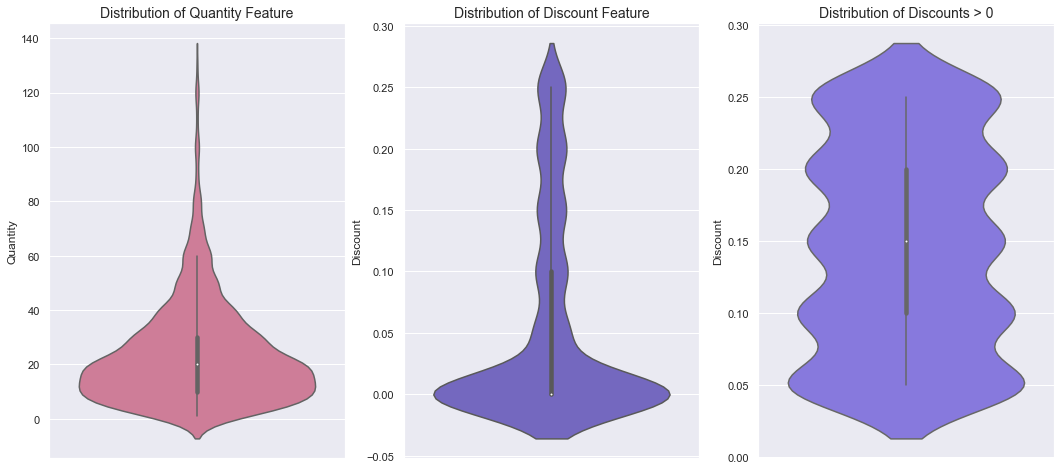

In [76]:
#visualize the distribution of Quantity & Discount variables.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8))

sns.violinplot( ax = axes[0], y = OrderDetail['Quantity'], color='PALEVIOLETRED' ) 
axes[0].set_title('Distribution of Quantity Feature', fontsize = 14)

sns.violinplot( ax = axes[1], y = OrderDetail['Discount'], color='slateblue' ) 
axes[1].set_title('Distribution of Discount Feature',fontsize = 14)

#Visualize the distribution of data in the discounted orders
sns.violinplot( ax = axes[2], y = DiscountedOrder['Discount'], color='mediumslateblue') 
axes[2].set_title('Distribution of Discounts > 0',fontsize = 14)


+ We have a higher Quantity density between 0 and 40 in the OrderDetail table distribution. (Mean Quantity is 23.81).  
+ We have the highest Discount density for 0.0 discount amount in the OrderDetail table distribution.   
+ However, for Orders with discounts applied, we have a higher Discount density at  5%, 10%, 20%, 15%, and 25% discount amounts.   


Text(0, 0.5, 'Quantity')

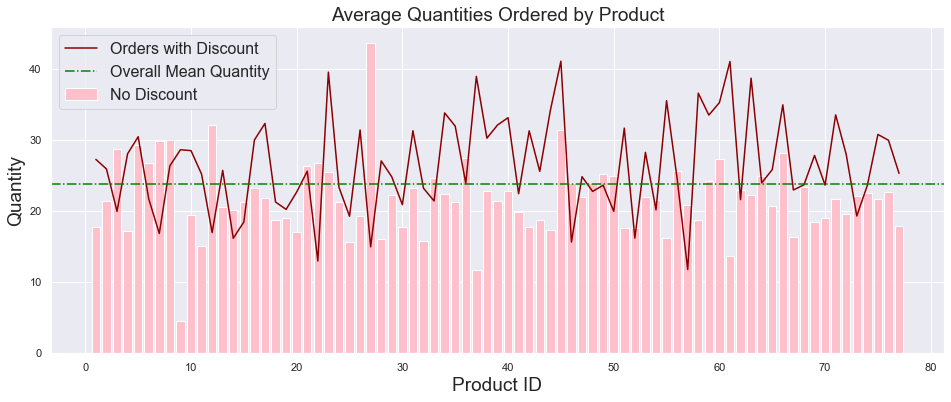

In [77]:
#historical data - for us to prove
fig, ax = plt.subplots(figsize = (16, 6))
DiscountedOrders = DiscountedOrder.groupby('ProductId')['Quantity'].mean()
NondiscountedOrders = NondiscountedOrder.groupby('ProductId')['Quantity'].mean()

plt.plot(DiscountedOrders.index, DiscountedOrders.values, alpha=1, label='Orders with Discount', color='darkred')
plt.bar(NondiscountedOrders.index, NondiscountedOrders.values, alpha=1, label='No Discount', color='pink')
ax.axhline(y = OrderDetail['Quantity'].mean(),linestyle='-.',color='green', label = 'Overall Mean Quantity' )

plt.legend(fontsize = 16)
plt.title('Average Quantities Ordered by Product', fontsize = 19)
plt.xlabel('Product ID', fontsize = 19)
plt.ylabel('Quantity', fontsize = 19)


Text(0, 0.5, 'Mean')

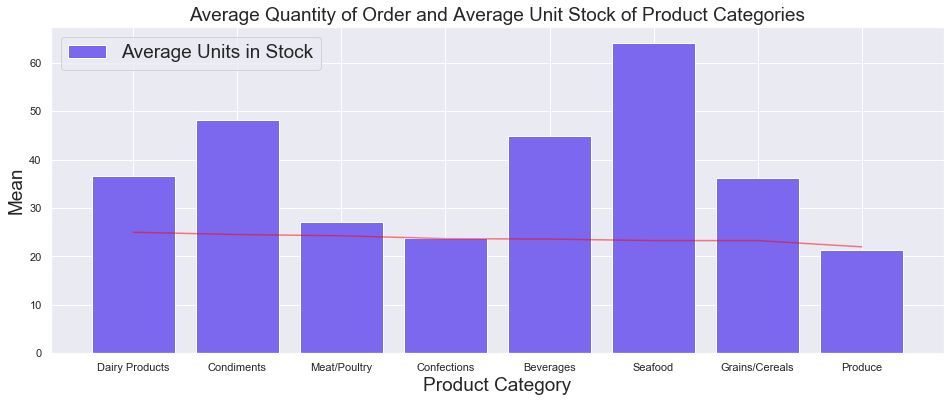

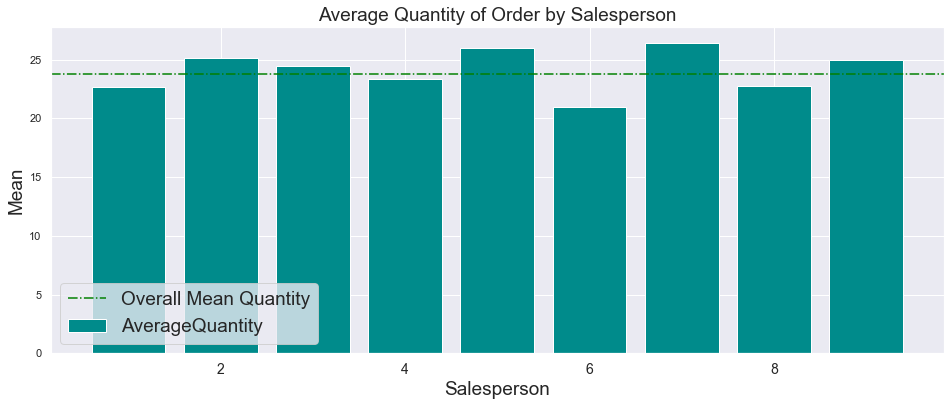

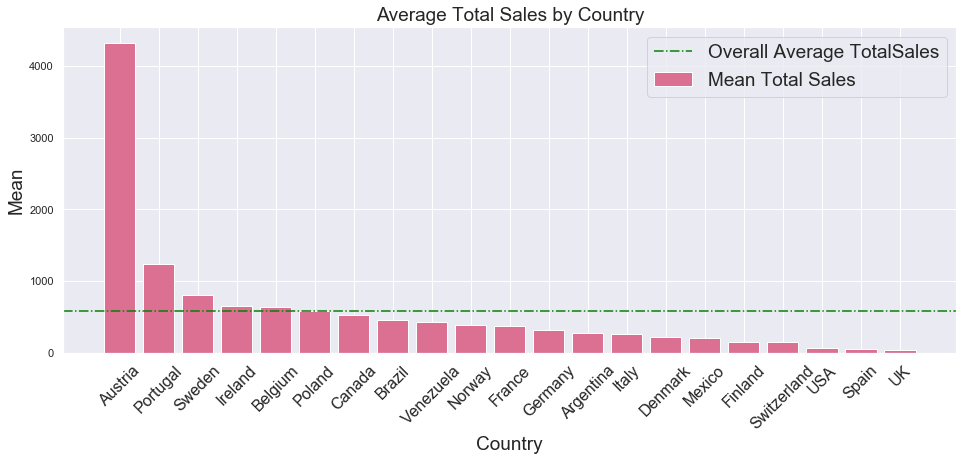

In [78]:
#Check the average quantity of Orders by Product Category
q1 = """SELECT  c.CategoryName, AVG(o.Quantity) as AverageQuantity 
        FROM OrderDetail o
        JOIN Product p on p.Id = o.ProductId
        JOIN Category as c on c.Id = p.CategoryId
        GROUP BY c.CategoryName
        ORDER BY  2 DESC;"""
#Check the average unit stock of Orders by Product Category
q2 = """SELECT  c.CategoryName , AVG(p.UnitsInStock) as AverageUnitsStock
        FROM OrderDetail d
        JOIN Product p on p.Id = d.ProductId
        JOIN Category as c on c.Id = p.CategoryId
        GROUP BY c.CategoryName
        ORDER BY  2 DESC;"""
#Check the average quantity of Orders by Salesperson
q3 ="""SELECT  e.Id  as Salesperson, AVG(o.Quantity) as AverageQuantity 
        FROM Orders b 
        JOIN Employee e on e.Id = b.EmployeeID
        JOIN OrderDetail o on b.Id = o.OrderID
        WHERE   o.Quantity is not null 
        GROUP BY e.Id
        ORDER BY 2 DESC;"""
#Check the average quantity of Orders by Customer Country
q4 ='''SELECT  c.Country, 
        (d.UnitPrice * d.Quantity * (1 - d.Discount)) as TotalSales   
        FROM Orders b 
        INNER JOIN Customer c on c.Id = b.CustomerID
        INNER JOIN OrderDetail d on b.Id = d.OrderID 
        GROUP BY c.Country
        ORDER BY 2 DESC ;'''

cat_qty = pysqldf(q1)
stck_qty  = pysqldf(q2)
salep_qty  = pysqldf(q3)
custdf = pysqldf(q4)

#Create the chart for average quantity of Orders by Product Category
fig, ax = plt.subplots(figsize = (16, 6))
plt.plot(cat_qty['CategoryName'],cat_qty['AverageQuantity'], alpha=.5,color='red')
plt.bar(stck_qty['CategoryName'],stck_qty['AverageUnitsStock'], alpha=1, label = 'Average Units in Stock', color='mediumslateblue')

plt.legend(fontsize = 19)
plt.title('Average Quantity of Order and Average Unit Stock of Product Categories', fontsize = 19)
plt.xlabel('Product Category', fontsize = 19)
plt.ylabel('Mean', fontsize = 19)

#Check the chart for average quantity of Orders by Salesperson
fig, ax = plt.subplots(figsize = (16, 6))
plt.bar(salep_qty['Salesperson'],salep_qty['AverageQuantity'], alpha=1, label = 'AverageQuantity', color='darkcyan')
ax.axhline(y = OrderDetail['Quantity'].mean(),linestyle='-.',color='green', label = 'Overall Mean Quantity' )

plt.legend(fontsize = 19)
plt.title('Average Quantity of Order by Salesperson', fontsize = 19)
plt.xlabel('Salesperson', fontsize = 19)
plt.ylabel('Mean', fontsize = 19)
plt.xticks(rotation = 0,fontsize =14)

#Check the average quantity of Orders by Customer Country
fig, ax = plt.subplots(figsize = (16, 6))
plt.bar(custdf['Country'],custdf['TotalSales'], alpha=1, label = 'Mean Total Sales', color='PALEVIOLETRED')
ax.axhline(y = custdf['TotalSales'].mean(),linestyle='-.',color='green', label = 'Overall Average TotalSales' )

plt.legend(fontsize = 19)
plt.title('Average Total Sales by Country', fontsize = 19)
plt.xlabel('Country', fontsize = 19)
plt.xticks(rotation = 45,fontsize =16)
plt.ylabel('Mean', fontsize = 19)


In [79]:
print('As per past Northwind Order history:')
print('{}% of discounted products have larger quantities than the products ordered without discounts.'.format(round(sum(DiscountedOrders.values > NondiscountedOrders.values)/len(DiscountedOrders.values)*100),2))
print('The Overall Mean Quantity is', OrderDetail['Quantity'].mean().round(2), '-  Average order quantity with discount - {} items, without - {} items'.format(round(DiscountedOrders.values.mean(),2), round(NondiscountedOrders.values.mean(),2)))


As per past Northwind Order history:
70.0% of discounted products have larger quantities than the products ordered without discounts.
The Overall Mean Quantity is 23.81 -  Average order quantity with discount - 26.43 items, without - 21.81 items


The idea that the customers tend to increase the quantity of products ordered if it was discounted, is evident in the data. Before we proceed with proving that our hypothesis is correct, we will continue with our data analysis to determine the appropriate test to use and if the assumptions of those specific tests are met.


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 3b. Outliers Check  

OrderId      411.5
ProductId     38.0
UnitPrice     20.0
Quantity      20.0
Discount       0.1
dtype: float64


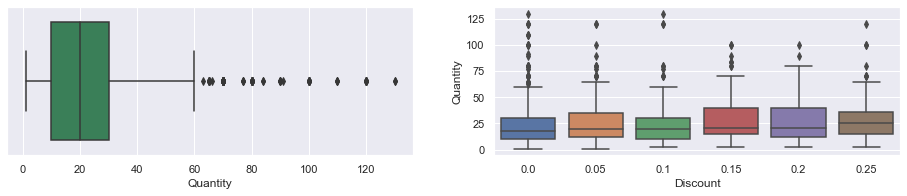

In [80]:
#Check for Outliers
Q1 = OrderDetail.quantile(0.25)
Q3 = OrderDetail.quantile(0.75)
IQR = Q3 - Q1
print(IQR) #get the IQR for each column and get the list of outliers

#Visually inspect for Outliers 
fig = plt.figure(figsize=(16,6))
a1 = fig.add_subplot(221)
sns.boxplot(OrderDetail['Quantity'] ,color='SEAGREEN')
a2 = fig.add_subplot(222)
sns.boxplot( OrderDetail['Discount'] , OrderDetail['Quantity'])


   To avoid risk of biasing the results by removing these outliers, as they may represent a certain segment of the population, we will proceed with the test without removing them and will check for other assumptions before running the hypothesis test.  
   
   We will be creating sample distributions and resampling, and recognize that the data is not perfectly normally distributed but the additional visualization steps below will help us determine if our data is normal enough for the assumptions to hold. 

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 3c. Normality check  

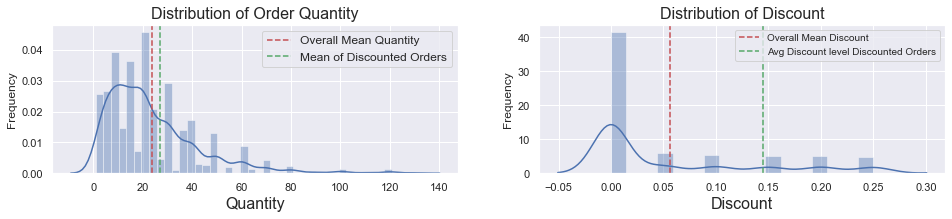

In [81]:
#Let's inspect the distribution
#Plot a histogram for the Quantity of Orders

fig = plt.figure(figsize=(16,6))
a1 = fig.add_subplot(221)
sns.distplot(OrderDetail['Quantity'])

plt.axvline(x=OrderDetail['Quantity'].mean(), color='r', linestyle='--',label = 'Overall Mean Quantity')
plt.axvline(x=DiscountedOrder['Quantity'].mean(), color='g', linestyle='--',label = 'Mean of Discounted Orders')
plt.title('Distribution of Order Quantity', fontsize=16)
plt.xlabel('Quantity of product ordered', fontsize=16)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend(fontsize = 12)
#Plot a histogram for the Quantity of Orders
a2 = fig.add_subplot(222)
sns.distplot(OrderDetail['Discount'])

plt.axvline(x=OrderDetail['Discount'].mean(), color='r', linestyle='--',label = 'Overall Mean Discount')
plt.axvline(x=DiscountedOrder['Discount'].mean(), color='g', linestyle='--',label = 'Avg Discount level Discounted Orders')
plt.title('Distribution of Discount', fontsize=16)
plt.xlabel('Discount amount of product ordered', fontsize=16)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.legend(fontsize = 10)

Text(0.5, 1.0, 'Quantity Q-Q plot ')

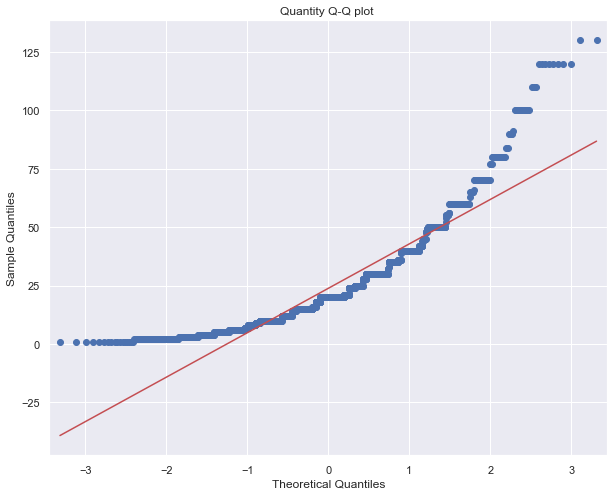

In [82]:
#Inspect the QQ plot for the Quantity of Orders

qqplot(OrderDetail.Quantity, line = 's')
plt.title('Quantity Q-Q plot ')


The Quantity distribution shows a positive skew with heavy tails on the right and skewness greater than the theoretical distribution.  
The Discount distribution shows a spike of constant values (values aligned horizontally) and more concentration on the 0 quantile.  
The QQplot shows deviation at the top and bottom of the plot

Our data is not normal however, the test that we will be performing involves inferences about the means. There are certain tests that are "robust" to the assumption of normality, including t-tests (1-sample, 2-sample, and paired t-tests) and Analysis of Variance (ANOVA).

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 3d. Sample Size and Data type check  

In this experiment, we will be comparing two groups, the control group will represent the Quantity of Orders without discounts and the experimental group, the Quantity of Orders with discounts.  
The assumption is that the sample sizes of each group would be equal and more than 30 records per group in order to obtain reliable estimates of variation.  
The mathematical basis of the t-test assumes that the data are continuous. 
Based on the Data, Sample Size, and Purpose of the test i.e. to compare two different numerical samples, we will be using the "2 Sample T-test"  ttest_ind , pval = ttest_ind(exp, control) 

In [83]:
# Let's create a new dataframe for the control and experimental groups
nodiscount = OrderDetail[OrderDetail['Discount'] == 0]
nodiscount = nodiscount['Quantity']
discount = OrderDetail[OrderDetail['Discount'] != 0]
discount = discount['Quantity']


Text(0.5, 1.0, 'Mean Quantity of Products Ordered')

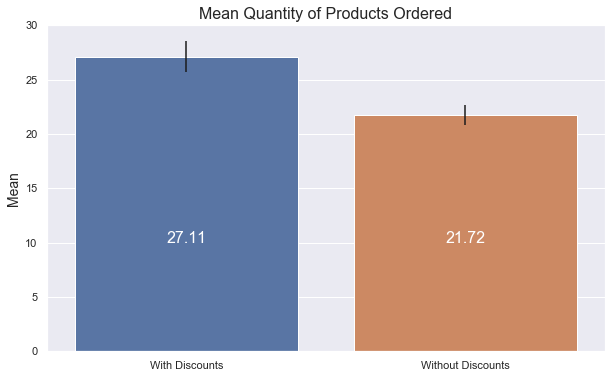

In [84]:
# Estimating standard error of the mean- measure of the dispersion of sample means 

disc = 1.96*(discount.std())/(np.sqrt(discount.shape[0]))
undisc = 1.96*(nodiscount.std())/(np.sqrt(nodiscount.shape[0]))

x = ['With Discounts', 'Without Discounts']
y = [discount.mean(), nodiscount.mean()]
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=x, y=y, yerr=[disc, undisc])
ax.set_ylim(0, 30)
plt.ylabel('Mean', fontsize = 14)

plt.text(s=round(y[1],2), x=1, y=10, color="w", horizontalalignment='center',size=16)
plt.text(s=round(y[0],2), x=0, y=10, color="w", horizontalalignment='center',size=16)

plt.title('Mean Quantity of Products Ordered', fontsize = 16)


In [85]:
print('The Control group mean is', nodiscount.mean(), 'and the standard deviation is ',nodiscount.std())
print('The Experimental group mean is', discount.mean(), 'and the standard deviation is ',discount.std())


The Control group mean is 21.715261958997722 and the standard deviation is  17.50749347239303
The Experimental group mean is 27.10978520286396 and the standard deviation is  20.77143923484604


+ There are differences in the mean, standard deviation, and variance between the control and experimental groups.  
+ In this experiment, we will run statistical tests to calculate whether the difference is significant, or not.

Control Group: Skewness  = 1.9115988573935339 kurtosis = 5.771124915313807
Experimental Group: Skewness = 1.5815727350866622 kurtosis = 3.2855655338966665


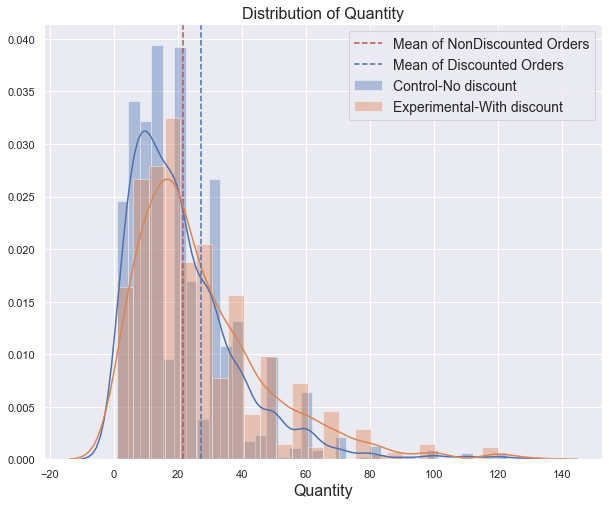

In [86]:
#Perform visual normality check for both samples' distributions and inspect the overlap using seaborn to get an idea of how different the samples might be from one another.
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(nodiscount,label='Control-No discount') # Blue control grp distribution
plt.axvline(x=NondiscountedOrder['Quantity'].mean(), color='r', linestyle='--',label = 'Mean of NonDiscounted Orders')

sns.distplot(discount, label='Experimental-With discount') # Orange exp grp distribution
plt.axvline(x=DiscountedOrder['Quantity'].mean(), color='b', linestyle='--',label = 'Mean of Discounted Orders')

plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=16)
plt.legend(fontsize = 14)

#Check Skewness & Kurtosis
print ('Control Group: Skewness  =', skew(nodiscount), 'kurtosis =', kurtosis(nodiscount))
print ('Experimental Group: Skewness =', skew(discount), 'kurtosis =', kurtosis(discount))


In [87]:
# Shapiro-Wilk tests the null hypothesis that the data was drawn from a normal distribution.
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

stat, p = shapiro(discount)
print('p=',p,'Fail to reject H0 p > 0.05 Discount Sample looks Gaussian') if  p > 0.05 else print('p=',p, 'Reject H0 Discount sample does not look Gaussian since p is < 0.05')

stat, p = shapiro(nodiscount)
print('p=',p,'Fail to reject H0 p > 0.05 NoDiscount Sample looks Gaussian') if  p > 0.05 else print('p=',p, 'Reject H0 NoDiscount sample does not look Gaussian since p is < 0.05')


p= 6.88120409395894e-26 Reject H0 Discount sample does not look Gaussian since p is < 0.05
p= 3.803856556577728e-34 Reject H0 NoDiscount sample does not look Gaussian since p is < 0.05


The Control group is leptokurtic ( kurtosis > 3 ). The control grpup distribution has longer and fatter tails. The peak is higher and sharper than the peak of a normal distribution, which means that data have heavy tails and that there are more outliers.

Skewness (1.9) bigger than 1 (positively skewed) means that the data are highly skewed. This means that more than half of the quantity of orders placed in the control group were less than the average quantity of 21.71 and that there are a limited number of orders placed without discount were higher than the average 21.71 leading to a long tail in the higher price ranges.

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 3e. Equal Variance check (Homoscedasticity)  


The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 
Levene’s test is used when there are significant deviations from normality.


In [88]:

print('Equal variances') if (np.var(nodiscount) == np.var(discount)) else print('Unequal Variances')
# Levene variance test for Control and Treatment groups 
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html
w , p = stats.levene(nodiscount.dropna(), discount.dropna())
print('statistic =', w ,' p=', p)
print('Reject H0 Samples have unequal variances') if p< .05 else print('Samples have equal variances')                             

Unequal Variances
statistic = 14.832671704073421  p= 0.00012091378376079568
Reject H0 Samples have unequal variances


If this assumption is violated, try corrections like using equal sample sizes, using test that are robust to different variances and to call the ttest_ind() method by passing the argument equal_var = False. 

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 3f. Independent sample check (Multicollinearity)  

In [89]:
#Let's check dependencies on the variables that we are going to work with
q=('''SELECT DISTINCT 
    ct.Id as CategoryId, 
    o.Id as Shipper, 
    o.ShipAddress, 
    o.ShipCity, 
    o.ShipRegion, 
    o.ShipPostalCode, 
    o.ShipCountry, 
    o.CustomerID, 
    c.CompanyName, 
    c.Address, 
    c.City, 
    c.Region,
    c.PostalCode, 
    c.Country, 
    e.Id as Salesperson, 
    o.OrderDate, 
    o.RequiredDate, 
    o.ShippedDate, 
    a.CompanyName, 
    d.ProductID, 
    p.ProductName, 
    d.Quantity, 
    d.Discount,
    d.UnitPrice,
    o.Freight,
    CASE
        WHEN Discount > 0 THEN 'Y' 
        ELSE 'N'
    END AS WithDiscount    
FROM Orders  o 
LEFT JOIN Shipper a  on a.Id = o.ShipVia 
LEFT JOIN Customer c on c.Id = o.CustomerID
LEFT JOIN Employee e on e.Id = o.EmployeeID
LEFT JOIN OrderDetail d on o.Id = d.OrderID
LEFT JOIN Product p on p.Id = d.ProductID
LEFT JOIN Category ct on ct.Id = p.CategoryID
ORDER BY d.Id ;''')
alldf = pysqldf(q)


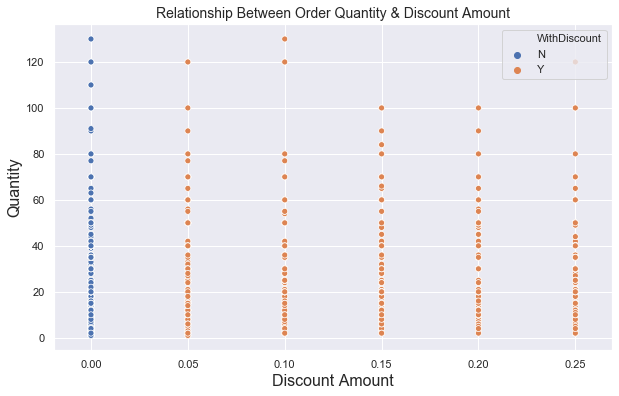

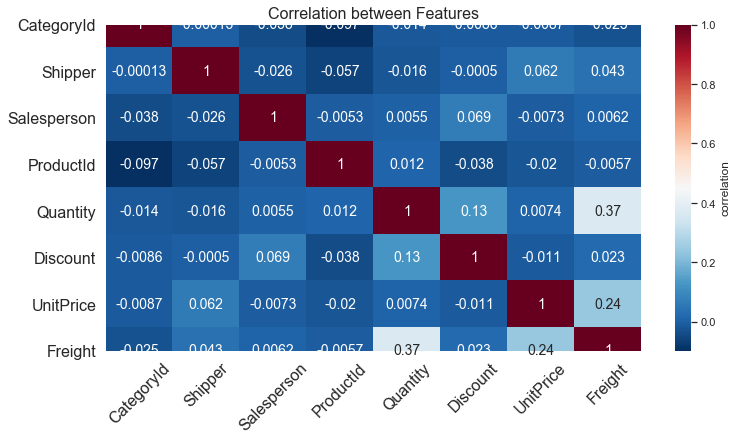

In [90]:
# Plot a scatter graph to visually inspect the relationship between variables
plt.figure(figsize = (10,6))
sns.scatterplot('Discount', 'Quantity', hue='WithDiscount', data=alldf)
plt.xlabel('Discount Amount', fontsize =16)
plt.ylabel('Quantity', fontsize =16)
plt.title('Relationship Between Order Quantity & Discount Amount',fontsize = 14)


plt.figure(figsize=(12,6))

# Compute the correlation matrix to determine the the strength of association between Quantity & Discount

sns.heatmap(alldf.corr(), cmap = 'RdBu_r', annot = True, annot_kws={'size': 14},
          cbar=True,  cbar_kws = {'label' : 'correlation'});
plt.title('Correlation between Features', fontdict={'fontsize': 16})

plt.xticks(rotation = 45,fontsize =16)
plt.yticks(rotation = 0, fontsize =16)

plt.show()

In [91]:
#alldf.corr(method ='pearson') 
alldf.corr()['Quantity'].sort_values(ascending=False)

Quantity       1.000000
Freight        0.370832
Discount       0.127576
ProductId      0.011932
UnitPrice      0.007366
Salesperson    0.005471
CategoryId    -0.014338
Shipper       -0.016260
Name: Quantity, dtype: float64

+ It's clear that there is no linear relationship between Quantity and Discount.  You can also see from the above heatmap that there are no multicollinearity between quantity, discount and other variables that we are interested in our discount exploration and testing.  
+ Independent samples are measurements made on two different sets of items. If the values in one sample reveal no information about those of the other sample, then the samples are independent. Give one group of order a discount and give another group of order no discounts, then compare the average quantity of items ordered between the group. These two samples would likely be independent because the measurements are from different groups. Knowing something about the distribution of values in the first sample doesn't inform you about the distribution of values in the second.
+ We determined the correlation to measure the relationship between Quantity & Discount variables.  When two things are correlated, it means that they vary together.  In our case, Quantity & Discount has a correlation coefficient of 0.13 which, indicates very weak relationship.  
+ The two samples are independent.

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

## 4. Run the Statistical Test  


### 4a. Statistical Hypothesis Process


### Does discount amount have a statistically significant effect on the quantity of a product in an order?

Steps to our Hypothesis Testing:
1.  State the **NULL and Alternative Hypotheses** 
   - NULL: **$H_0$ :𝜇1=𝜇2**  
"The quantity of product in an order that have discounts (experimental group)  will have the same average as the quantity of product in an order that do not have discounts (control group)."

   - ALTERNATIVE: **$H_A$  :𝜇1≠𝜇2**  
"The quantity of product in an order with discounts will **not** have the same average as the quantity of product in an order that do not have discounts (control group). They will be higher or lower.



2.  In this experiment we are setting the **Alpha Level ( 𝛼 ) to 0.05 or 5% significance level**. Alpha sets the standard for how extreme the data must be before we can reject the null hypothesis. Alpha is a threshold value used to judge whether a test statistic is statistically significant.  
  
3.  Identify the **test statistic** to be used to assess the truth of the null hypothesis. 
  
4.  **Compute the p-value.**  The smaller the P-value, the stronger the evidence against the null hypothesis. If the probability level is less than our chosen alpha level, we will reject the null hypothesis of equal means and conclude that the means are different.  
  
5.  **Compare the p-value to the significance value alpha.** If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. The confidence limits of the difference allows us to put bounds on the size of the difference. If these limits are narrow and close to zero, we might determine that even though our results are statistically significant, the magnitude of their difference is not of practical interest.


  

To prepare for the results of our hypothesis testing, we can contruct the following contingency table.  
<img src='./ErrorType.png' height="70%" width="70%">

The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test.  

The assumptions of the Independent two-sample t-test are:
1. The data are continuous (not discrete). We are checking for means of quantity i.e. continuous data.
2. The data follow the normal probability distribution.
3. The variances of the two populations are equal. (If not, the Welch Unequal-Variance T test is used.)
4. The two samples are independent. There is no relationship between the individuals in one sample as compared to the other and cannot influence the other group.
5. Both samples are simple random samples from their respective populations. Each individual in the population has an equal probability of being selected in the sample. (create sample distributions)
6. No outliers

+ Each group should have at least 6 subjects, ideally more. 
+ Roughly balanced design (i.e., same number of subjects in each group) are ideal. Extremely unbalanced designs increase the possibility that violating any of the requirements/assumptions will threaten the validity of the Independent Samples t Test.
+ When one or more of the assumptions for the Independent Samples t Test are not met, we may want to run the nonparametric Mann-Whitney U Test instead.

Let's run our sampling distribution before we run our statistical tests to see if our discount and nodiscount sample means meet the assumptions.

### 4b. Create a Sample Distribution of Sample Means (with replacement)  


A simple random sample is chosen in such a way that every set of individuals has an equal chance to be in the selected sample. The distribution of our sample violates assumption of normality and variance and our discount distribution has many modes. Repeated random sample of our quantitative variables will be taken below to help with our hypothesis testing. Sampling distributions are important for making inferences about the overall population.

In [92]:
#create a Sample Distribution of Sample Means (with replacement)
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

#helper function that takes in a sample and returns the mean of that sample.
def get_sample_mean(sample):
    return sum(sample) / len(sample)


# create a function that returns the sample dist of sample means given the dataset, the size of the distribution to create, and the size of each individual sample.
def create_sample_distribution(data, dist_size=800, n=600):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist


In [93]:
# create sample distributions of sample mean for control and experimental
nodiscount_sample = create_sample_distribution(nodiscount)
discount_sample = create_sample_distribution(discount)


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4c. Run the hypothesis test  

Control Group: Skewness  = 0.024330955113649574 kurtosis = -0.3305057689694739
Experimental Group: Skewness = 0.05478065889345267 kurtosis = -0.1043274430690051


The Control group (No discount) mean is : 21.73987708333333 and the standard deviation is: 0.7025608580023859
The Experimental group (with discount) mean is : 27.127264583333336 and the standard deviation is: 0.8364210795746188


The difference in mean is  5.387387500000006
The variance for experimental is 0.6996002223567708  and for the control group is  0.4935917591970486


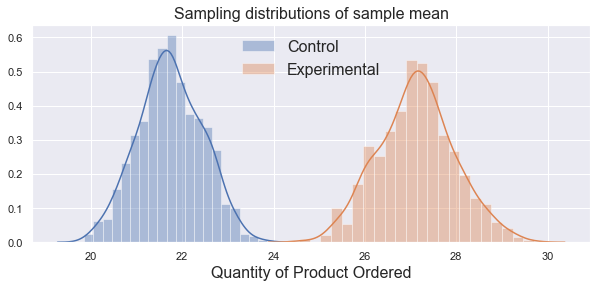

In [94]:
plt.figure(figsize = (10, 4))
sns.distplot(nodiscount_sample, label='Control')
sns.distplot(discount_sample, label='Experimental')
plt.title('Sampling distributions of sample mean', fontsize=16)
plt.xlabel('Quantity of Product Ordered', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

#Check Skewness & Kurtosis
print ('Control Group: Skewness  =', skew(nodiscount_sample), 'kurtosis =', kurtosis(nodiscount_sample))
print ('Experimental Group: Skewness =', skew(discount_sample), 'kurtosis =', kurtosis(discount_sample))
print('\n')
print('The Control group (No discount) mean is :', np.array(nodiscount_sample).mean() , 'and the standard deviation is:',np.array(nodiscount_sample).std())
print('The Experimental group (with discount) mean is :', np.array(discount_sample).mean() , 'and the standard deviation is:',np.array(discount_sample).std())
print('\n')
print('The difference in mean is ', np.array(discount_sample).mean() - np.array(nodiscount_sample).mean())
print('The variance for experimental is', np.array(discount_sample).var(),' and for the control group is ' ,np.array(nodiscount_sample).var())


In [95]:
#Check for normality of the sample distribution
s,p = stats.normaltest(nodiscount_sample)
print( stats.normaltest(nodiscount_sample))
print('Fail to reject H0 p > 0.05 Discount Sample looks Gaussian') if  p > 0.05 else print('Reject H0 Discount sample does not look Gaussian since p is < 0.05')
print('\n')
s,p = stats.normaltest(discount_sample)
print( stats.normaltest(discount_sample))
print('Fail to reject H0 p > 0.05 Discount Sample looks Gaussian') if  p > 0.05 else print('Reject H0 Discount sample does not look Gaussian since p is < 0.05')


NormaltestResult(statistic=4.866025940065747, pvalue=0.08777197944166194)
Fail to reject H0 p > 0.05 Discount Sample looks Gaussian


NormaltestResult(statistic=0.6728509328872185, pvalue=0.7143191223366753)
Fail to reject H0 p > 0.05 Discount Sample looks Gaussian


The sample mean distributions are normal. The difference between the means, standard deviation and variance of the control and experimental groups are apparent.  How confident are we that this measured difference is real? Now we are ready to perform the two sample t-test to evaluate this.

### Welch's unequal variance t-test

The unequal variance above renders one assumption is not met. Hence, if the samples have unequal variance, set equal_var to False then perform Welch’s t-test, which is a robust test in the face of assumption violation.  

"Welch's unequal variances t-test" — or "unequal variances t-test" are also known as "unpaired" or "independent samples" t-tests, as they are typically applied when the statistical units underlying the two samples being compared are non-overlapping. 

In [96]:
#Calculate the T-test for the means of two independent samples of unequal variance using Welch's t-test.  
t_stat, p = stats.ttest_ind(discount_sample, nodiscount_sample, equal_var=False)
print('t_stat =', t_stat,'and the p-value =', p ) 

#Obtain the right-tailed value by dividing the two-tailed value .05 by two for the two-tailed test. 
print('Reject Null Hypothesis since p is < 0.05') if p <= 0.05 else print('Failed to reject Null Hypothesis since p > 0.05')


t_stat = 139.41080689362616 and the p-value = 0.0
Reject Null Hypothesis since p is < 0.05


[**`stats.ttest_ind`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

### Decision and Conclusion

In [97]:
print('''Interpretation of the p-value for the Independent T-Test 2 Tailed at Significance level = 0.05 ''')
print('------------------------------------------------------------------------------------------------------')
print('The t-value is ',  t_stat, ' The p-value is' , p, '.There was a significant difference in average quantity between discounted and non-discounted orders at p<0.5 (2-tailed)') 
print('------------------------------------------------------------------------------------------------------')
print('The ',  len(discount_sample), 'experimental sample that received discounts ',
      '(Mean =', np.array(discount_sample).mean().round(2), 'Std = ', np.array(discount_sample).std().round(2),')',
      'compared to the ','\n', len(nodiscount_sample) ,' control sample that received no discounts ',
      '(Mean =', np.array(nodiscount_sample).mean().round(2), 'Std = ', np.array(nodiscount_sample).std().round(2),')',
      '\n','demonstrated higher mean quantity of product ordered ',  'at pvalue =',  p )


Interpretation of the p-value for the Independent T-Test 2 Tailed at Significance level = 0.05 
------------------------------------------------------------------------------------------------------
The t-value is  139.41080689362616  The p-value is 0.0 .There was a significant difference in average quantity between discounted and non-discounted orders at p<0.5 (2-tailed)
------------------------------------------------------------------------------------------------------
The  800 experimental sample that received discounts  (Mean = 27.13 Std =  0.84 ) compared to the  
 800  control sample that received no discounts  (Mean = 21.74 Std =  0.7 ) 
 demonstrated higher mean quantity of product ordered  at pvalue = 0.0


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4d. Effect Size  


We need to describe the results in terms of measures of magnitude – not just, does the discount affect quantity of product ordered, but how much does it affect them.  Effect size is a quantitative measure of the magnitude of the discount(experimenter) effect. The larger the effect size the stronger the relationship between two variables.


In [98]:
#Compute Cohen's d 
def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


In [99]:
d = Cohen_d(np.array(discount_sample), np.array(nodiscount_sample))

In [100]:
print(d)
print( 'Effect size is Small') if d <= 0.2 else print('Effect size is Large') if d >= 0.8 else print('Effect size is Medium')

6.974901020956855
Effect size is Large


As per Cohen, d=0.2 is considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.  
This implementation uses the "pooled standard deviation," which is a weighted average of the standard deviations of the two groups.  

Our Cohen_d value  is 6.9 which is > .8, thus represents a large effect size. Effect size quantifies the size of the difference between our control and experimental groups, and may therefore be said to be a true measure of the significance of the difference.  
 
Let's Calculate the power of the statistical t test to determine the probability of rejecting the null hypothesis, given that it is indeed false. 

In [101]:

power = TTestIndPower()
#Calculate power
power.solve_power(effect_size=6, nobs1=25, alpha=.05)


1.0

In [102]:
# Calculate sample size required to achieve a power of 1
power.solve_power(effect_size=6, alpha=.05, power=1)

50.0

In [103]:
# Calculate minimum effect size to satisfy desired alpha and power as well as respect sample size limitations
power.solve_power(nobs1=25, alpha=.05, power=.8)

0.8087077886680412

This output indicates that the power of the statistical test is 1,hence, a perfect test that guarantees rejecting the null hypothesis when it is indeed false.
These results indicate that using 800 transactions in each group and with given statistics, the statistical power of the experiment is 1. This can be interpreted as follows:

*If a large effect (6.9 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 100% of the time. *
Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4e. Is there a difference in the mean quantity between discount levels?  

#### ANOVA Test for Quantity Discount Level Significance  

We rejected the NULL hypothesis and have evidence that there are significant differences in the mean quantity of product between our control and experimental groups, so the next step, is to measure which level of discount is significant.  
We've seen that there are 10 distinct discount amounts namely 0.05,0.10,0.20, 0.15,0.25,0.03, 0.02, 0.01,0.04, and 0.06.  
We will utilize the one-way ANOVA as the statistical test since we will be comparing means for three or more populations and will be testing only one factor i.e. to see whether the variations in the quantity or product ordered are due to the discount levels or whether the variations are purely random. 

To use one-way ANOVA, the following conditions must be present: 
  +  The populations of interest must be normally distributed. 
  +  The samples must be independent of each other.
  +  Each population must have the same variance.
 
We know from our previous testing that our sample has unequal variances and that the distributions are not perfectly normal. ANOVA is robust to the homogeneity of variance violation and to data that are not normally distributed.  Due to our sufficiently large random sample we will proceed with the test as we are assuming that the distribution of means calculated from repeated sampling will approach normality. We can consider normality as a given for us due to the central limit theorem for large samples. 

The Hypothesis of interest for our one-way anova test is as follows:
- $H_0$: μ1 = μ2 = μ3 = μ4 = μ5: There is no difference in means of quantity of product between the experimental(with discounts) and the control group for each of the discount levels.
- $H_A$: μ1 ≠ μ2 ≠ μ3 ≠ μ4 ≠ μ5:  The means of quantity of product ordered are not all equal between discount levels. It can be higher or lower.

Alpha is set at 0.05



In [104]:
#Run the ANOVA test
# wrap with C() to indicate categorical variable We indicate categorical variables by wrapping them with C()*
formula = 'Quantity ~ C(Discount)'
lm = ols(formula, OrderDetail).fit()
table = sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
C(Discount),15969.214452,5.0,8.990431,1.816734e-08
Residual,763430.421743,2149.0,NaN,NaN


[**`stats.anova_lm`**](https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html)  


### Conclusion 

In [105]:
print('F_stat =', table['F'][0].round(3),'and the p-value =', table['PR(>F)'][0].round(3)) 
print('Reject Null Hypothesis since p is < 0.05. The difference between discount amount is statistically significant.') if table['PR(>F)'][0].round(3) < 0.05 else print('Failed to reject Null Hypothesis since p > 0.05')


F_stat = 8.99 and the p-value = 0.0
Reject Null Hypothesis since p is < 0.05. The difference between discount amount is statistically significant.


pvalue is < .05, indicating that there is enough evidence to support the claim that there is a difference in the average quantity in an order between discount level means (rejection of the null hypothesis).  

Please note that the ANOVA alone does not tell us specifically which means were different from one another. To determine that, we would need to follow up with multiple comparisons (or post-hoc) tests.  

Since we only have a discount levels to compare, let's run the same test for each of the discount levels to find out exactly where the differences are.  


In [106]:
#Create a dataframe to save the discount amount individual test statistics, p value, decision, Cohen's d, and effect size 
discount_levels = pd.DataFrame(columns=['Discount %','F-test','Null Hypothesis','< p','pvalue','Cohens d'], index=None)

discounts = [0.05, 0.10,  0.20, 0.15, 0.25] #we have excluded discount levels with value counts < than 100
control = OrderDetail[OrderDetail['Discount']==0]['Quantity']
for i in discounts:
    experimental = OrderDetail[OrderDetail['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(experimental,control)
    d = Cohen_d(experimental, control)
    discount_levels = discount_levels.append( { 'Discount %' : str(i*100)+'%' ,'F-test' : st, 'Null Hypothesis' : 'Reject' if p <= 0.05 else 'Failed','< p' : p <= 0.05 ,'pvalue': p, 'Cohens d' : d ,'effect size' : 'Small' if d <= 0.2 else 'Large' if d >= 0.8 else 'Medium'}  , ignore_index=True)    

discount_levels


,Discount %,F-test,Null Hypothesis,< p,pvalue,Cohens d,effect size
0,5.0%,3.712927,Reject,True,0.000212,0.286135,Medium
1,10.0%,2.423259,Reject,True,0.015501,0.195942,Small
2,20.0%,3.601949,Reject,True,0.000326,0.300712,Medium
3,15.0%,4.411193,Reject,True,0.000011,0.372404,Medium
4,25.0%,4.304937,Reject,True,0.000018,0.366593,Medium


### Conclusion

Based on the table above, 5%, 15%, 20% and 25% have lesser p values and greater effect size than the 10% discount.  For 10% discount, the difference is small, even if it is statistically significant. To verify the individual t-test results above, let's run the Tukey's Multicomparison test to tell us exactly which pairs of discount levels between the experimental and control group have different means. Tukey's Method is a post hoc test to find where the differences occurred between groups and they should only be run when we have shown an overall statistically significant difference in group means (i.e., a statistically significant one-way ANOVA result).


In [107]:
# Set up the data for comparison 
MultiComp = MultiComparison(OrderDetail['Quantity'], OrderDetail['Discount'])
# Show all pair-wise comparisons:
# Print the comparisons
print(MultiComp.tukeyhsd().summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0   0.05    5.207 0.0047  1.0635  9.3506   True
   0.0    0.1   3.5217   0.19 -0.8257  7.8692  False
   0.0   0.15   6.6669  0.001  2.1279 11.2059   True
   0.0    0.2   5.3096 0.0098  0.8212  9.7979   True
   0.0   0.25    6.525  0.001  1.9467 11.1033   True
  0.05    0.1  -1.6853    0.9 -7.3138  3.9432  False
  0.05   0.15   1.4599    0.9 -4.3179  7.2377  False
  0.05    0.2   0.1026    0.9 -5.6355  5.8406  False
  0.05   0.25    1.318    0.9 -4.4907  7.1267  False
   0.1   0.15   3.1452 0.6347 -2.7805  9.0709  False
   0.1    0.2   1.7879    0.9 -4.0991  7.6748  False
   0.1   0.25   3.0033 0.6783 -2.9526  8.9591  False
  0.15    0.2  -1.3573    0.9 -7.3872  4.6725  False
  0.15   0.25  -0.1419    0.9  -6.239  5.9552  False
   0.2   0.25   1.2154    0.9 -4.8441  7.2749  False
----------------------------------------------

[**`stats.multicomp.pairwise_tukey`**](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

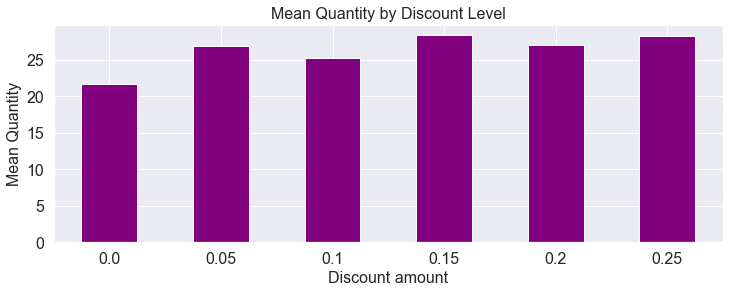

In [108]:
plt.figure(figsize=(12,4))
disclevel = OrderDetail['Quantity'].groupby(OrderDetail['Discount']).mean()
disclevel.plot(kind='bar', color='purple')
plt.title('Mean Quantity by Discount Level',fontsize =16)
    
plt.xticks(rotation = 0,fontsize =16)
plt.yticks(fontsize =16)
ax.set_ylim(0, 30)
plt.ylabel('Mean', fontsize = 14)

plt.xlabel('Discount amount',fontsize =16)
plt.ylabel('Mean Quantity', fontsize =16)

plt.show()


### Conclusion


We are getting consistent results between individual T test and Tukey test.  Remember the null hypothesis states that there are no differences between the means between discount amounts. Looking at the comparison results, we reject the null hypothesis at the 5%, 15%, 20% and 25% discount levels when compared with the control group. In other words, when discounts of 5, 15, 20 and 25% are applied, we observe a statistically significant effect on the quantity of product ordered but not at 10%.

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4f. Is there a difference in the mean quantity of order between product categories?  

- $H_0$: μ1 = μ2 = μ3 .. μn:  There is no difference in average quantity of products between categories
- $H_A$: μ1 ≠ μ2 ≠ μ3 .. μn:  There is a difference in average quantity of product between categories  

Alpha is set to 0.05


In [109]:
#Get the data
q = ('''SELECT o.Quantity,  c.CategoryName, c.Id as CategoryId,o.Discount,
        CASE
            WHEN Discount > 0 THEN 1 
            ELSE 0
        END AS WithDiscount
        FROM OrderDetail o
        JOIN Product p on p.Id = o.ProductId
        JOIN Category as c on c.Id = p.CategoryId;''')
prod_cat = pysqldf(q)
display(prod_cat.describe(),prod_cat.groupby('CategoryName').Quantity.agg(['mean']))

,Quantity,CategoryId,Discount,WithDiscount
count,2155.000000,2155.000000,2155.000000,2155.000000
mean,23.812993,4.135499,0.056241,0.388863
std,19.022047,2.378567,0.083431,0.487605
min,1.000000,1.000000,0.000000,0.000000
25%,10.000000,2.000000,0.000000,0.000000
50%,20.000000,4.000000,0.000000,0.000000
75%,30.000000,6.000000,0.100000,1.000000
max,130.000000,8.000000,0.250000,1.000000


,mean
CategoryName,
Beverages,23.594059
Condiments,24.527778
Confections,23.670659
Dairy Products,24.997268
Grains/Cereals,23.275510
Meat/Poultry,24.271676
Produce,21.985294
Seafood,23.275758


In [110]:
#Run Anova to test significant differences between the means of the independent groups
formula = 'Quantity ~ C(CategoryId)'
lm = ols(formula, prod_cat).fit()
tprod_cat = sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame
tprod_cat

,sum_sq,df,F,PR(>F)
C(CategoryId),1292.377084,7.0,0.509429,0.828058
Residual,778107.259110,2147.0,NaN,NaN


### Conclusion

In [111]:
print('F_stat =', tprod_cat['F'][0].round(3),'and the p-value =', tprod_cat['PR(>F)'][0].round(3)) 
print('Reject Null the Hypothesis since p is < 0.05 The difference between discount amount is statistically significant.') if  tprod_cat['PR(>F)'][0].round(3) <= 0.05 else print('Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in mean quantity between product categories.')


F_stat = 0.509 and the p-value = 0.828
Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in mean quantity between product categories.


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4f2.  Is there a difference in the mean quantity of order between product categories and discounts?

- $H_0$: μ1 = μ2 = μ3 .. μn:  There is no difference in average quantity of product between categories
- $H_A$: μ1 ≠ μ2 ≠ μ3 .. μn:  There is a difference in average quantity of product between categories

Alpha is set to 0.05


In [112]:
#Run Anova to test significant differences between the means of the independent groups
formula = 'Quantity ~ C(CategoryId)*C(WithDiscount)'
lm = ols(formula, prod_cat).fit()
tprod_catd = sm.stats.anova_lm(lm, typ=2) 
tprod_catd 

,sum_sq,df,F,PR(>F)
C(CategoryId),1118.470015,7.0,0.449689,8.708672e-01
C(WithDiscount),14729.606130,1.0,41.454988,1.484744e-10
C(CategoryId):C(WithDiscount),3357.463105,7.0,1.349892,2.226259e-01
Residual,760020.189876,2139.0,NaN,NaN


### Conclusion

In [113]:
print('F_stat =', tprod_catd['F'][2].round(3),'and the p-value =', tprod_catd['PR(>F)'][2].round(3)) 
print('Reject Null Hypothesis since p is < 0.05. The difference between discount amount is statistically significant.') if tprod_catd['PR(>F)'][2].round(3) <= 0.05 else print('Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in mean quantity between product categories and discounts.')


F_stat = 1.35 and the p-value = 0.223
Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in mean quantity between product categories and discounts.


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4g. Is there a statistically significant difference in discount between product categories?  

- $H_0$: μ1 = μ2 = μ3 .. μn:  There is no difference in discounts between product categories
- $H_A$: μ1 ≠ μ2 ≠ μ3 .. μn:  There is a difference in discounts between product categories

Alpha is set to 0.05


In [114]:
#Run Anova to test significant differences between the means of the independent groups
formula = 'Discount ~ C(CategoryId)'
lm = ols(formula, prod_cat).fit()
tprod_catd = sm.stats.anova_lm(lm, typ=1) 
tprod_catd 

,df,sum_sq,mean_sq,F,PR(>F)
C(CategoryId),7.0,0.074530,0.010647,1.532223,0.151717
Residual,2147.0,14.919025,0.006949,NaN,NaN


### Conclusion


In [115]:
print('F_stat =', tprod_catd['F'][0].round(3),'and the p-value =', tprod_catd['PR(>F)'][0].round(3)) 
print('Reject Null Hypothesis since p is < 0.05. The difference between discount amount is statistically significant.') if tprod_catd['PR(>F)'][0].round(3) <= 0.05 else print('Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in discount amount between product categories.')


F_stat = 1.532 and the p-value = 0.152
Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in discount amount between product categories.


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4h. Is there a difference in the mean quantity of order between salesperson?  

- $H_0$: μ1 = μ2 = μ3 .. μn:  There is no difference in average quantity of product between salespersons
- $H_A$: μ1 ≠ μ2 ≠ μ3 .. μn:  There is a difference in average quantity of product between salespersons

Alpha is set to 0.05


In [116]:
q=('''SELECT  
   d.Id  as Salesperson, d.FirstName , d.LastName ,
    e.Quantity, 
    e.Discount,
    e.UnitPrice * e.Quantity * (1 - e.Discount) as TotalSales,
    CASE
        WHEN Discount > 0 THEN 1 
        ELSE 0
    END AS WithDiscount
FROM Orders b 

LEFT JOIN Employee d on d.Id = b.EmployeeID
LEFT JOIN OrderDetail e on b.Id = e.OrderID
LEFT JOIN Product f on f.Id = e.ProductID
WHERE   e.Quantity is not null 
ORDER BY e.Id;''')
salesdf = pysqldf(q)
salesdf.head()
display(salesdf.describe(),salesdf.groupby('Salesperson').Quantity.agg(['mean']))

,Salesperson,Quantity,Discount,TotalSales,WithDiscount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,4.333179,23.812993,0.056241,587.372337,0.388863
std,2.490351,19.022047,0.083431,969.225716,0.487605
min,1.000000,1.000000,0.000000,4.800000,0.000000
25%,2.000000,10.000000,0.000000,147.000000,0.000000
50%,4.000000,20.000000,0.000000,337.750000,0.000000
75%,7.000000,30.000000,0.100000,656.000000,1.000000
max,9.000000,130.000000,0.250000,15810.000000,1.000000


,mean
Salesperson,
1,22.643478
2,25.124481
3,24.461059
4,23.328571
5,25.948718
6,20.994048
7,26.443182
8,22.742308
9,24.953271


In [117]:
#Run Anova to test significant differences between the means of the independent groups
formula = 'Quantity ~ C(Salesperson)'
lm = ols(formula, salesdf).fit()
tsalesdf = sm.stats.anova_lm(lm, typ=2) 
tsalesdf

,sum_sq,df,F,PR(>F)
C(Salesperson),4643.183282,8.0,1.607646,0.11745
Residual,774756.452913,2146.0,NaN,NaN


### Conclusion

In [118]:
print('F_stat =', tsalesdf['F'][0].round(3),'and the p-value =', tsalesdf['PR(>F)'][0].round(3)) 
print('Reject Null Hypothesis since p is < 0.05') if tsalesdf['PR(>F)'][0].round(3) <= 0.05 else print('Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in mean quantity of order between Salespersons.')

F_stat = 1.608 and the p-value = 0.117
Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in mean quantity of order between Salespersons.


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

### 4i. Is there a difference in the mean Total Sales per Order between Customer Country?  


In [119]:
q=('''SELECT  c.Country, 
    (e.UnitPrice * e.Quantity * (1 - e.Discount)) as TotalSales   
FROM Orders b 
INNER JOIN Customer c on c.Id = b.CustomerID
INNER JOIN OrderDetail e on b.Id = e.OrderID 
ORDER BY 2 DESC ;''')
custdf = pysqldf(q)
display(custdf['TotalSales'].groupby(custdf['Country']).describe(), custdf.groupby('Country').TotalSales.agg(['mean']))


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Argentina,23.0,202.560870,149.196355,12.50,64.50000,155.00000,308.0000,527.000
Austria,125.0,1024.030708,1260.878133,36.00,331.50000,606.90000,1197.0000,8432.000
Belgium,56.0,604.015268,580.804619,14.00,193.09500,450.00000,775.2500,2750.000
Brazil,163.0,498.210301,1274.380358,8.64,132.37500,280.00000,490.9550,15810.000
Canada,75.0,669.283867,1067.354908,22.50,156.80000,396.80000,750.5000,8263.360
Denmark,46.0,710.022228,1558.969648,14.40,187.65625,350.30000,592.5000,10540.000
Finland,54.0,348.334306,305.821999,17.88,126.00000,269.00000,492.0000,1310.000
France,175.0,455.670986,536.561072,8.50,124.20000,259.20000,558.4000,3465.000
Germany,328.0,702.087297,1169.192029,13.50,183.35000,444.11250,811.8750,15019.500


,mean
Country,
Argentina,202.560870
Austria,1024.030708
Belgium,604.015268
Brazil,498.210301
Canada,669.283867
Denmark,710.022228
Finland,348.334306
France,455.670986
Germany,702.087297


In [120]:
#Run Anova to test significant differences between the means of the independent groups
formula = 'TotalSales ~ C(Country)'
lm = ols(formula, custdf).fit()
tcustdf = sm.stats.anova_lm(lm, typ=1)
tcustdf


,df,sum_sq,mean_sq,F,PR(>F)
C(Country),20.0,7.129481e+07,3.564741e+06,3.849617,1.915607e-08
Residual,2057.0,1.904779e+09,9.259987e+05,NaN,NaN


### Conclusion

In [121]:
print('F_stat =', tcustdf['F'][0].round(3),'and the p-value =', tcustdf['PR(>F)'][0].round(3)) 
print('Reject Null Hypothesis since p is < 0.05. There is a statistically significant difference in the Mean Total Sales between Countries.') if tcustdf['PR(>F)'][0].round(3) <= 0.05 else print('Failed to reject the Null Hypothesis since p > 0.05.  There is NOT enough evidence to support the claim that there is a difference in TotalSales between Countries.')

F_stat = 3.85 and the p-value = 0.0
Reject Null Hypothesis since p is < 0.05. There is a statistically significant difference in the Mean Total Sales between Countries.


Please note that the ANOVA alone does not tell us specifically which means were different from one another. To determine that we would need to follow up with multiple comparisons (or post-hoc) tests.

In [122]:
# Set up the data for comparison 
MultiComp = MultiComparison(custdf['TotalSales'], custdf['Country'])
# Show all pair-wise comparisons:
# Print the comparisons
print(MultiComp.tukeyhsd().summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------
  Argentina     Austria  821.4698 0.0263     41.154 1601.7857   True
  Argentina     Belgium  401.4544    0.9  -450.2995 1253.2083  False
  Argentina      Brazil  295.6494    0.9  -470.4008 1061.6997  False
  Argentina      Canada   466.723 0.8988  -353.0186 1286.4646  False
  Argentina     Denmark  507.4614 0.8789  -370.8333  1385.756  False
  Argentina     Finland  145.7734    0.9  -710.5603 1002.1072  False
  Argentina      France  253.1101    0.9  -509.6855 1015.9057  False
  Argentina     Germany  499.5264 0.6531  -242.3152 1241.3681  False
  Argentina     Ireland  706.1647  0.275  -147.8406 1560.1699  False
  Argentina       Italy   94.9892    0.9  -763.7543  953.7327  False
  Argentina      Mexico   98.4955    0.9  -755.5098  952.5008  False
  Argentina      Norway   155.886 

### Conclusion


There is a statistically significant difference in the average TotalSales between customers from Austria & Argentina, Austria & Brazil, Austria & Finland, Austria & France, Austria & Italy, Austria & Mexico, Austria & Spain, Austria & UK, Austria & Venezuela. While Austria has the largest Total sales followed by Portugal, the test however didn't find a significant difference in the mean Total sales between these two countries.

[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 

## 5. Interpret Findings  

Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

+ **Discount has a significant effect on quantity ordered.**

What levels of discounts have a statistically significant effect on the quantity of a product in an order?   
+ There is enough evidence to support the claim that there is a difference in mean quantity of orders between discount levels. **5%, 15%, 20%, and 25% discount levels have a significant effect on quantity of product ordered.**  

We also looked at other features that may have an effect on quantity ordered and discount motivations such as product categories, salespersons granting discounts, and customers.  

There are certain products that are more strongly in the customer focus. Knowing these primary products will help set competitive price. Knowing your secondary products could gve you more flexibility with pricing. 



Is there a difference in the mean quantity of order between product categories?  
+ **There is NOT enough evidence to support the claim that there is a difference in mean quantity between product categories.**

Is there a difference in the mean quantity of order between product categories and discounts?
+ **There is NOT enough evidence to support the claim that there is a difference in mean quantity between product categories and whether or not a discount is applied.**

Is there a difference in the mean quantity of order between salespersons and whether or not discounts are applied?  
+ **There is NOT enough evidence to support the claim that there is statistically significant difference in average quantity of product ordered between salespersons.**

Is there a difference in the Average  Total Sales between Countries?  
+ **There is a statistically significant difference in the average TotalSales between customers from Austria & Argentina, Austria & Brazil, Austria & Finland, Austria & France, Austria & Italy, Austria & Mexico, Austria & Spain, Austria & UK, Austria & Venezuela. While Austria has the largest Total sales followed by Portugal, the test however didn't find a significant difference in the mean Total sales between these two countries.**

I hope the findings above could provide a baseline information to help the Marketing Team in discount pricing  and help guide further exploration to determine where discounts has an effect in boosting volume of sales and profit. Further study is recommended to determine the variety of motivations for quantity discounts to help provide guidelines to the organization in designing quantity discount schedules and set out the most fruitful directions for future research.


## Recommendation for Future Studies

While discounts significantly impact the quantity of products ordered and increase overall sales volume, it would be advantageous to understand  the true impact of giving a discount to ensure profitability when offering discount pricing. We recommend that other metrics impacting discount pricing methods be considered for future research.  

+ How can we identify customers with below-average margins? How could we segment discount offers to different types of customers (first-time, dormant, repeat) to entice new sales without losing out on the margins of sales?
+ What type of discount (e.g. volume discount, event or seasonal discount, free shipping) has a higher impact on the volume of sales? 
+ Analyze granted discount frequencies and how the Sales Team is using the full range of percentages to understand how to link discounts with sales incentives.  In addition to analyzing which salesperson sells the most, further focus on profit analysis is equally important.
+ Does giving a 20% discount mean the company has to sell 20% more product to make up for what the company gave away? How much more will Northwind need in sales volume to generate the same amount of gross profit dollars as before?
+ Is there enough market demand to generate 20 percent more sales with a 10% drop in price. Is the discount really necessary?


[<a href="#Module-3-Final-Project">Jump back to Table of Contents</a>]  
 